In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [0]:
dfa_columns = ["game_id", "move_id", "move", "time", "white_positions", "black_positions"]
dfb_columns = ["game_id", "jogador"]
dfc_columns = ["game_id", "board_id", "player1", "player2"]
dfd_columns = ["board_id", "r", "c", "white_positions", "black_positions"]

In [0]:
dataframe_a = pd.read_csv("http://www.ic.unicamp.br/~udias/si202/df_a.csv", header = None, skipinitialspace = True, quotechar = '"', names = dfa_columns)
dataframe_b = pd.read_csv("http://www.ic.unicamp.br/~udias/si202/df_b.csv", header = None, skipinitialspace = True, quotechar = '"', names = dfb_columns)
dataframe_c = pd.read_csv("http://www.ic.unicamp.br/~udias/si202/df_c.csv", header = None, skipinitialspace = True, quotechar = '"', names = dfc_columns)
dataframe_d = pd.read_csv("http://www.ic.unicamp.br/~udias/si202/df_d.csv", header = None, skipinitialspace = True, quotechar = '"', names = dfd_columns)

In [0]:
dataframe_a.head()

,game_id,move_id,move,time,white_positions,black_positions
0,0,0,"((2, 5), (3, 4))",0.072,"[(1, 5), (3, 3), (3, 1), (2, 1), (3, 2), (2, 2...","[(5, 6), (3, 1), (5, 2), (6, 2), (5, 3), (3, 2..."
1,0,1,"((4, 6), (5, 5))",0.033,"[(2, 1), (2, 5), (1, 5), (2, 4), (4, 5), (3, 6...","[(6, 2), (4, 4), (4, 6), (5, 6), (4, 5), (6, 3..."
2,0,2,NaN,0.127,"[(1, 5), (3, 3), (3, 1), (2, 1), (3, 2), (1, 4...","[(5, 6), (5, 2), (6, 2), (5, 3), (3, 2), (4, 1..."
3,1,0,"((2, 5), (3, 4))",0.072,"[(1, 5), (3, 3), (3, 1), (2, 1), (3, 2), (2, 2...","[(5, 6), (3, 1), (5, 2), (6, 2), (5, 3), (3, 2..."
4,1,1,"((4, 5), (5, 6))",0.034,"[(2, 1), (4, 6), (2, 5), (1, 5), (2, 4), (3, 6...","[(6, 2), (4, 4), (4, 6), (4, 5), (5, 5), (6, 3..."


In [0]:
dataframe_b.head()

,game_id,jogador
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1


In [0]:
dataframe_c.head()

,game_id,board_id,player1,player2
0,0,0,a,b
1,1,0,a,c
2,2,0,b,a
3,3,0,b,c
4,4,0,c,a


In [0]:
dataframe_d.head()

,board_id,r,c,white_positions,black_positions
0,0,6,6,"[(1, 5), (3, 3), (3, 1), (2, 1), (3, 2), (2, 2...","[(5, 6), (3, 1), (5, 2), (3, 4), (6, 2), (5, 3..."
1,1,6,6,"[(3, 3), (1, 5), (3, 5), (1, 6), (2, 6), (3, 6...","[(6, 2), (5, 4), (4, 1), (3, 2), (4, 3), (3, 6..."
2,2,6,6,"[(1, 4), (1, 1), (2, 4), (3, 4), (2, 5), (1, 2...","[(5, 5), (4, 6), (4, 2), (6, 1), (3, 2), (5, 3..."
3,3,6,6,"[(2, 2), (3, 6), (2, 5), (2, 1), (2, 6), (3, 3...","[(4, 6), (6, 3), (4, 2), (6, 5), (3, 4), (5, 1..."
4,4,6,6,"[(2, 3), (1, 6), (3, 4), (3, 5), (1, 2), (2, 1...","[(6, 1), (6, 3), (5, 1), (5, 2), (3, 1), (3, 5..."


* Criação da coluna **"winner"** para melhor vizualização entre partida e vencedor
* Adição da coluna **"jogador"** do dataframe_b para usar de referência para cor do jogador vencedor (0:branca | 1:preta)

In [0]:
dataframe_c['winner'] = dataframe_b['jogador']

mp1 = dataframe_c.winner.where(dataframe_c.winner != "0", dataframe_c.player1)
mp2 = dataframe_c.winner.where(dataframe_c.winner != "1", dataframe_c.player2)

winner_column = mp1.where(mp1 != "1", mp2)

In [0]:
df_matches = dataframe_c.drop(columns="winner")

df_matches["winner"] = winner_column
df_matches["winner_color_id"] = dataframe_b["jogador"]

df_matches.head()

,game_id,board_id,player1,player2,winner,winner_color_id
0,0,0,a,b,b,1
1,1,0,a,c,c,1
2,2,0,b,a,a,1
3,3,0,b,c,b,0
4,4,0,c,a,a,1


### Jogadores X Numero de Vitórias 

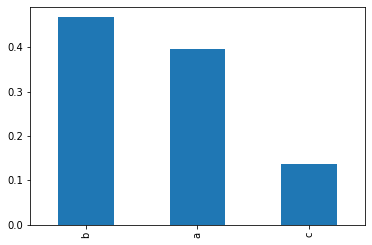

In [0]:
df_matches.winner.value_counts(normalize=True).head(3).plot.bar()

### Cor X Numero de Vitórias

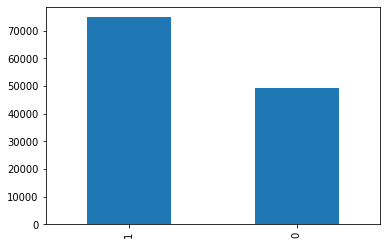

In [0]:
df_matches.winner_color_id.value_counts().head(2).plot.bar()

### Análise
Tendo em vista a diferença entre a taxa de vitórias das peças pretas em relação as brancas, podemos deduzir que o fator determinante para que isso ocorra esteja na **disposição das peças no tabulairo**, uma vez que *todos os jogadores jogam contra si*, tanto iniciando de brancas como de pretas, assim tendo 3 jogadores, existem 6 jogos por tabuleiro.

In [0]:
df_matches["winner_color_id"] = pd.to_numeric(df_matches["winner_color_id"], errors="coerce")

Calcular a taxa de vitórias de branca e de preta para cada tabuleiro, no intuito de verificar se a hipótese acima possui algum fundamento

In [0]:
board_win_rate = 6 - df_matches.groupby(['board_id']).winner_color_id.sum()

df_board_win_rate = board_win_rate.to_frame(name="white_win_rate")

df_board_win_rate["black_win_rate"] = 6 - board_win_rate

df_board_win_rate.head()

,white_win_rate,black_win_rate
board_id,,
0,1.0,5.0
1,4.0,2.0
2,2.0,4.0
3,0.0,6.0
4,1.0,5.0


### Tabuleiro X Taxa de vitória por cor  

Avarege of White Wins: 2.381024
Avarege of Black Wins: 3.618976


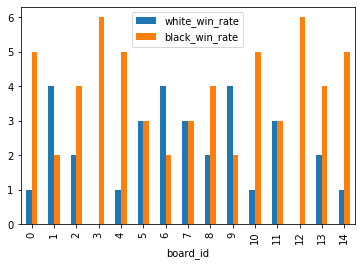

In [0]:
# win rate per board
print("Avarege of White Wins: %lf"%df_board_win_rate.white_win_rate.mean())
print("Avarege of Black Wins: %lf"%df_board_win_rate.black_win_rate.mean())

df_board_win_rate.head(15).plot.bar()

* Analisando o gráfico acima, podemos perceber que os tabuleiros como 3 e 12, reforçam a hipótese acima, uma vez que independente do jogador, o jogador de pretas nunca perdia
* Com isso podemos calcular um **score** para cada tabuleiro normalizando seu **win_rate**

In [0]:
board_score_column = board_win_rate/6 + (board_win_rate-6)/6
df_data = board_score_column.to_frame(name="score")

df_data["r"] = dataframe_d.r
df_data["c"] = dataframe_d.c

df_data["white_positions"] = dataframe_d.white_positions
df_data["black_positions"] = dataframe_d.black_positions

df_data.head() #train a evaluator

,score,r,c,white_positions,black_positions
board_id,,,,,
0,-0.666667,6,6,"[(1, 5), (3, 3), (3, 1), (2, 1), (3, 2), (2, 2...","[(5, 6), (3, 1), (5, 2), (3, 4), (6, 2), (5, 3..."
1,0.333333,6,6,"[(3, 3), (1, 5), (3, 5), (1, 6), (2, 6), (3, 6...","[(6, 2), (5, 4), (4, 1), (3, 2), (4, 3), (3, 6..."
2,-0.333333,6,6,"[(1, 4), (1, 1), (2, 4), (3, 4), (2, 5), (1, 2...","[(5, 5), (4, 6), (4, 2), (6, 1), (3, 2), (5, 3..."
3,-1.000000,6,6,"[(2, 2), (3, 6), (2, 5), (2, 1), (2, 6), (3, 3...","[(4, 6), (6, 3), (4, 2), (6, 5), (3, 4), (5, 1..."
4,-0.666667,6,6,"[(2, 3), (1, 6), (3, 4), (3, 5), (1, 2), (2, 1...","[(6, 1), (6, 3), (5, 1), (5, 2), (3, 1), (3, 5..."


### Partida X Tempo da Partida

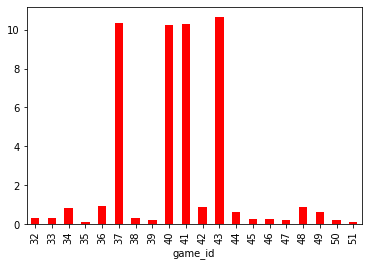

In [0]:
time_per_match = dataframe_a.groupby(["game_id"]).time.sum()

time_per_match[32:52].plot.bar(color="red")

### Análise 
* Tendo em vista o gráfico acima podemos perceber certas discrepâncias no tempo das partidas 37, 40, 41 e 43

* Mostrar estes dados em frames para tentar entender essa anomalia  

In [0]:
df_matches[37:43]

,game_id,board_id,player1,player2,winner,winner_color_id
37,37,6,a,c,a,0.0
38,38,6,b,a,b,0.0
39,39,6,b,c,b,0.0
40,40,6,c,a,a,1.0
41,41,6,c,b,b,1.0
42,42,7,a,b,a,0.0


* Analisando os jogadores e os vencedores, podemos perceber uma relação em comum, **o jogador "c"**, pois em todas as partidas que o mesmo joga, ele não ganha e ainda o tempo é muito alto. Com isso podemos concluir que o **jogador "c"**, demorou tanto para fazer um lance e perdeu por ultrapassar o tempo limite
* Com isso me recordo que em uma aula o professor me disse que o jogador de *Leonardo Furone* entrava em Loop Infinito, o que explicaria a situação do **jogador "c"**. Logo o **jogador c** pertence a **Leonardo Furone**

### Média de tempo por partida

In [0]:
df_game_id_idx = dataframe_a.set_index("game_id")

def get_move_time(player):
  selected_white = df_game_id_idx.loc[df_matches.game_id[(df_matches.player1 == player)]]
  time_move_per_match_white = selected_white[selected_white.move_id % 2 == 0]
  return time_move_per_match_white.groupby(["game_id"]).time.sum().mean()

players = ['a', 'b', 'c']

pd.DataFrame(list(map(get_move_time, players)), index=players, columns=["time_per_match"])

,time_per_match
a,3.700233
b,0.294554
c,0.565029


* Observando os dados acima, percebemos que a média de tempo por partida do **jogador "a"** se distancia dos demais, logo podemos inferir que isso se deve ao algoritimo por tras dele, uma vez que não existe interferencias externas nos testes 

* Com isso me lembro que implementei o algoritomo minimax, que por sua vez, utiliza do conceito de busca em profundidade, e mesmo com metodos para melhorar a eficiencia do mesmo, ele ainda apresenta um tempo de execução consideravel

* Logo a possibilidade do **jogador "a"** pertencer a *Henrique Campiotti* se mostra muito alta

* Levando a hipotese acima em consideração temos que o **jogador "b"** pertence a *Leonardo Ferrari*